# Load packages

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib widget

saveFigures = True

# Load data

In [2]:
# Load data from Our World In Data
dfDK = pd.read_csv('owid-co2-data.csv')

# Clean data
dfDK = dfDK[dfDK.country == 'Denmark'].copy()
dfDK['Date'] = [np.datetime64(str(int(x))+'-01-01') for x in dfDK.year]
dfDKfull = dfDK.copy()
dfDK = dfDK[dfDK.Date >= np.datetime64('1989-01-01')]

In [3]:
# Load data from Climate Monitor
dfCM = pd.read_csv('carbonmonitor-eu_datas_2024-04-22.csv')

# Clean data
dfCM['date'] = pd.to_datetime(dfCM.date.str.replace('/','-'),format="%d-%m-%Y")
dfDK2 = dfCM[dfCM.country == 'Denmark']
dfDK2 = dfDK2[['date','value']].groupby('date').sum()
dfDK2['year'] = dfDK2.index.year


In [4]:
# Load data from Danmark Statistik
df3 = pd.read_csv('DanmarkStatistik_Drivhus.csv',encoding='latin1',skiprows=3)

# Clean data
df3 = df3.iloc[[1,2],2:].T
df3.index.name = 'year'
df3 = df3.reset_index()

df3['date'] = pd.to_datetime([np.datetime64(str(x)+'-01-01') for x in df3.year])
# df3 = df3.rename(columns={1:'Value'})
df3 = df3.rename(columns={1:'Total',2:'Transport'})
df3['Value'] = df3.Total-df3.Transport
df3['Daily'] = df3.Value / (365.25*1000)
df3['DailyCorrected'] = df3.Daily * 0.75

df3 = df3.set_index('date')

In [5]:
# df3

In [6]:
indexDaily = df3.DailyCorrected.values[0]
indexDaily

0.15220533880903492

In [7]:
dfYear = df3.copy().drop(columns='year')
dfYear = dfYear / indexDaily
dfYear.head()

dfDay = dfDK2.copy().drop(columns='year')
dfDay = dfDay / indexDaily 


In [8]:
dfDay.rolling(window=365).mean().tail(40)
dfDay.rolling(window=365).mean().tail()

,value
date,
2024-01-27,0.617563
2024-01-28,0.616949
2024-01-29,0.616457
2024-01-30,0.616109
2024-01-31,0.615872


In [9]:


# dfGoal 

d1 = np.datetime64('2024-01-01')
d2 = np.datetime64('2026-01-01')
d2 = np.datetime64('2027-01-01')
ds = np.arange(d1,d2)
dfGoal = pd.DataFrame(index=ds)
dfGoal['Avg'] = .52
dfGoal['Min'] = 0.5
dfGoal['Max'] = 0.54

dfGoal['Avg'] = 0.48
dfGoal['Min'] = 0.46
dfGoal['Max'] = 0.50

y1 = 0.609017
y2 = 0.43098
y2 = 0.3525
dfGoal['LinearStart2024'] = np.linspace(y1,y2,len(ds))
dfGoal.mean()


dfGoal['MostRecent'] = 0

# dfDay.rolling(window=365).mean()[]
# dfGoal['MostRecent'] = dfDay[dfDay.index >= np.datetime64('2024-01-01')].value
dfGoal['MostRecentMean'] = dfDay[dfDay.index >= np.datetime64('2024-01-01')].value.expanding().mean()
dfGoal['MostRecent'] = dfDay[dfDay.index >= np.datetime64('2024-01-01')].value

yConst = 0.515
dfGoal['MostRecentConst'] = dfGoal.MostRecent.fillna(yConst)


firstMissing = np.where(dfGoal['MostRecent'].isna())[0][0]

yLin1 = dfGoal.MostRecent.iloc[firstMissing-1]
yLin1

yLin2 = 0.28
yLin2 = 0.2
yLin2 = 0.295

# dfGoal.MostRecent.iloc[firstMissing-1]
dfGoal['MostRecentLinear'] = dfGoal.MostRecent
dfGoal['MostRecentLinear'].iloc[firstMissing:] = np.linspace(yLin1,yLin2,len(ds)-firstMissing)

yLin2Log = 0.335
yLin2Log = 0.275
yLin2Log = 0.33
dfGoal['MostRecentLog'] = dfGoal.MostRecent
dfGoal['MostRecentLog'].iloc[firstMissing:] = np.logspace(np.log10(yLin1),np.log10(yLin2Log),len(ds)-firstMissing)
# dfGoal.head(40)

dfGoal.mean()



Avg                 0.480000
Min                 0.460000
Max                 0.500000
LinearStart2024     0.480758
MostRecent          0.749645
MostRecentMean      0.698337
MostRecentConst     0.521637
MostRecentLinear    0.480474
MostRecentLog       0.480037
dtype: float64

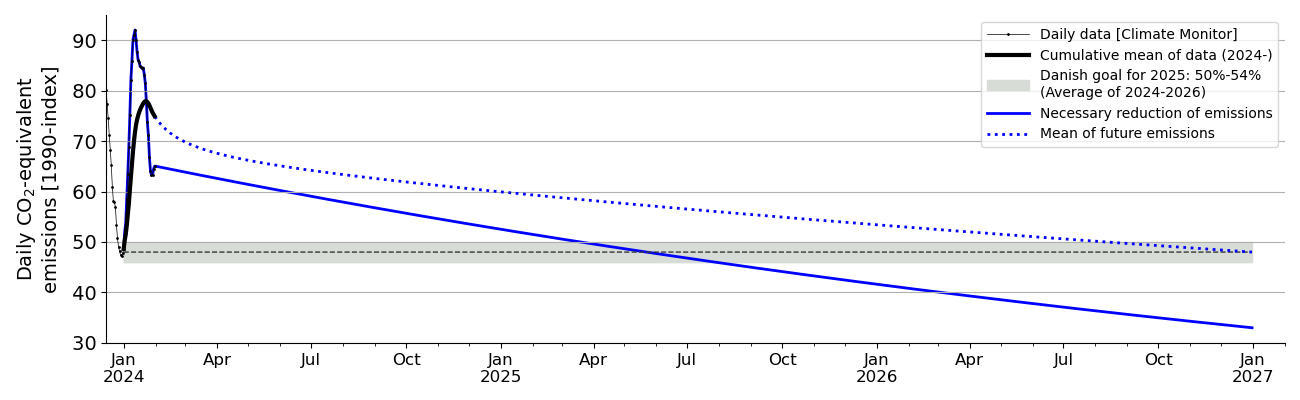

In [122]:
fig,ax = plt.subplots(figsize=(13,4))

# ax.plot(dfDay.value,'.-',ms=3,lw=0.5)
# ax.plot(dfDay.value,'.',color='k',ms=3,lw=0.5,label='Daily data [Climate Monitor]')
ax.plot(dfDay.value,'.-',color='k',ms=2,lw=0.5,label='Daily data [Climate Monitor]')
# ax.plot(dfDay.value.rolling(window=7*4).mean(),'.-',color='k',ms=2,lw=0.5,label='Daily data [Climate Monitor]')
ax.plot(dfGoal.MostRecentMean,color='k',label='Cumulative mean of data (2024-)',zorder=5,lw=3)
# ax.plot(dfDay.value.rolling(window=7,center=True).mean())
# ax.plot(dfDay.value.rolling(window=365,center=True).mean())
# ax.plot(dfDay.value.rolling(window=365).mean())
# # ax.step(df3.index,df3.DailyCorrected,where='post')
# ax.plot(dfYear.index + np.timedelta64(180,'D'),dfYear.DailyCorrected,'k.-')


ax.fill_between(
    dfGoal.index,
    dfGoal.Min,
    dfGoal.Max,
    color='xkcd:light grey',
    label='Danish goal for 2025: 50%-54%\n(Average of 2024-2026)'
)
ax.plot(dfGoal.Avg,color='xkcd:dark grey',ls='--',lw=1)

# ax.plot(dfGoal.MostRecent)
# ax.plot(dfGoal.MostRecentConst)
# ax.plot(dfGoal.MostRecentLinear,label='Necessary reduction of emissions,\nassuming linear decrease',lw=0.4)
# ax.plot(dfGoal.MostRecentLinear.expanding().mean(),label='Necessary reduction of emissions,\nassuming linear decrease',lw=3,ls=':')
# ax.plot(dfGoal.MostRecentLog,label='Necessary reduction of emissions,\nassuming logarithmic decrease',lw=0.4)
# ax.plot(dfGoal.MostRecentLog.expanding().mean(),label='Necessary reduction of emissions,\nassuming logarithmic decrease',lw=3,ls='--')

ax.plot(dfGoal.MostRecentLog,label='Necessary reduction of emissions',lw=2,color='b',zorder=1)
ax.plot(dfGoal.MostRecentLog.expanding().mean(),label='Mean of future emissions',lw=2,ls=':',color='b')
# ax.plot(dfGoal.LinearStart2024)
# ax.plot(dfGoal.MostRecent,label='Cumulative mean of data (2024-)',zorder=5)

ax.legend(handlelength=3)

ax.set_xlim([
    np.datetime64('2022-01-01'),
    np.datetime64('2027-02-01'),
])


# locator = mdates.AutoDateLocator()
locator = mdates.MonthLocator(bymonth = np.arange(1,13,2))
locator = mdates.MonthLocator(bymonth = np.arange(1,13,3))
# interval=2
locator2 = mdates.MonthLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ['%b\n%Y',  # ticks are mostly years
                        '%b',       # ticks are mostly months
                        '%d',       # ticks are mostly days
                        '%H:%M',    # hrs
                        '%H:%M',    # min
                        '%S.%f', ]  # secs
formatter.zero_formats = [''] + formatter.formats[:-1]
# formatter.zero_formats[3] = '%d-%b'
# formatter.zero_formats[3] = '%d-%b'  

formatter.offset_formats = ['',
                            '%Y',
                            '%b %Y',
                            '%d %b %Y',
                            '%d %b %Y',
                            '%d %b %Y %H:%M', ]


ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator2)
ax.xaxis.set_major_formatter(formatter)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True,axis='y')


# ax.plot(dfGoal.MostRecentLog.expanding().mean())

ax.set_ylim(bottom=0.25)
# ax.set_ylim(bottom=0)
ax.set_ylim(top=1.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

def formatter100(x, pos):
    del pos
    return f'{x*100:3.0f}'

ax.yaxis.set_major_formatter(formatter100)

ax.set_ylabel(r'Daily CO$_{2}$-equivalent'+'\nemissions [1990-index]',fontsize=14)

fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025Goal')


ax.set_xlim(left=np.datetime64('2023-12-15'))
ax.set_ylim([.30,.95])

fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025GoalZoom')


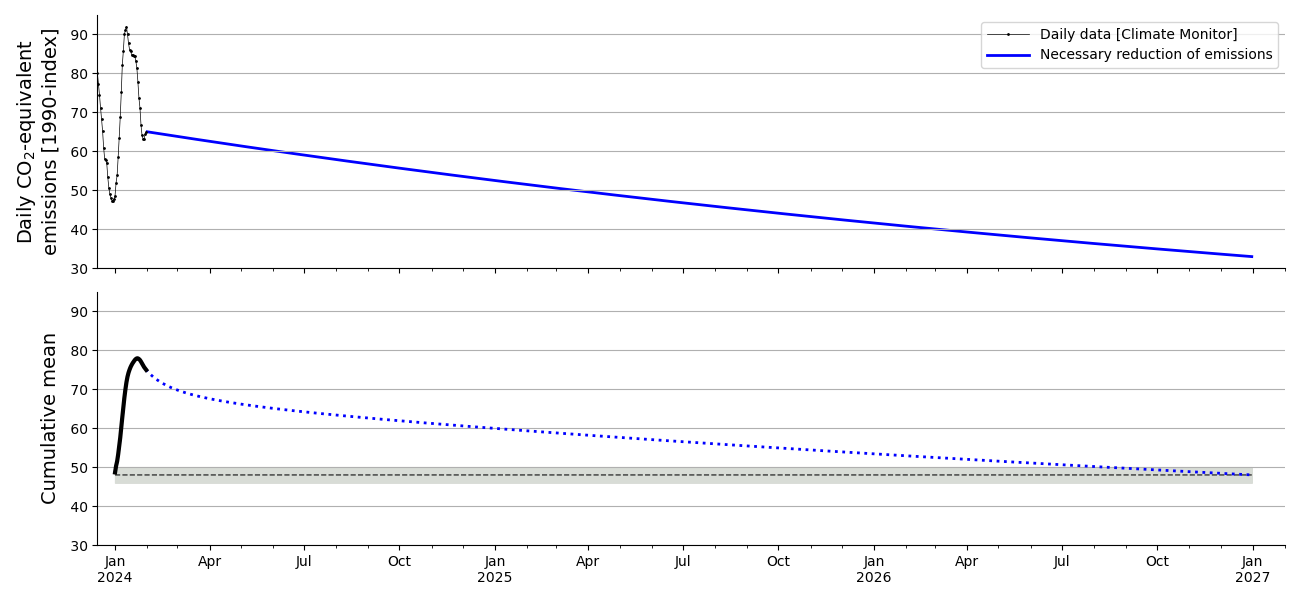

In [128]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True,figsize=(13,6))

ax.plot(dfDay.value,'.-',color='k',ms=2,lw=0.5,label='Daily data [Climate Monitor]')
ax2.plot(dfGoal.MostRecentMean,color='k',label='Cumulative mean of data (2024-)',zorder=5,lw=3)

ax2.fill_between(
    dfGoal.index,
    dfGoal.Min,
    dfGoal.Max,
    color='xkcd:light grey',
    label='Danish goal for 2025: 50%-54%\n(Average of 2024-2026)'
)
ax2.plot(dfGoal.Avg,color='xkcd:dark grey',ls='--',lw=1)

ax.plot(dfGoal.MostRecentLog.iloc[firstMissing:],label='Necessary reduction of emissions',lw=2,color='b',zorder=1)
ax2.plot(dfGoal.MostRecentLog.expanding().mean(),label='Mean of future emissions',lw=2,ls=':',color='b')
# ax.plot(dfGoal.LinearStart2024)
# ax.plot(dfGoal.MostRecent,label='Cumulative mean of data (2024-)',zorder=5)

ax.legend(handlelength=3)

ax.set_xlim([
    np.datetime64('2022-01-01'),
    np.datetime64('2027-02-01'),
])


# locator = mdates.AutoDateLocator()
locator = mdates.MonthLocator(bymonth = np.arange(1,13,2))
locator = mdates.MonthLocator(bymonth = np.arange(1,13,3))
# interval=2
locator2 = mdates.MonthLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ['%b\n%Y',  # ticks are mostly years
                        '%b',       # ticks are mostly months
                        '%d',       # ticks are mostly days
                        '%H:%M',    # hrs
                        '%H:%M',    # min
                        '%S.%f', ]  # secs
formatter.zero_formats = [''] + formatter.formats[:-1]
# formatter.zero_formats[3] = '%d-%b'
# formatter.zero_formats[3] = '%d-%b'  

formatter.offset_formats = ['',
                            '%Y',
                            '%b %Y',
                            '%d %b %Y',
                            '%d %b %Y',
                            '%d %b %Y %H:%M', ]


ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator2)
ax.xaxis.set_major_formatter(formatter)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True,axis='y')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True,axis='y')


# ax.plot(dfGoal.MostRecentLog.expanding().mean())

ax.set_ylim(bottom=0.25)
# ax.set_ylim(bottom=0)
ax.set_ylim(top=1.1)

# ax.set_xticks(ax.get_xticks(),fontsize=12)
# ax.set_yticks(ax.get_yticks(),fontsize=14)

def formatter100(x, pos):
    del pos
    return f'{x*100:3.0f}'

ax.yaxis.set_major_formatter(formatter100)
ax2.yaxis.set_major_formatter(formatter100)

ax.set_ylabel(r'Daily CO$_{2}$-equivalent'+'\nemissions [1990-index]',fontsize=14)
ax2.set_ylabel('Cumulative mean',fontsize=14)

fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025Goal_Split')


ax.set_xlim(left=np.datetime64('2023-12-15'))
ax.set_ylim([.30,.95])
ax2.set_xlim(left=np.datetime64('2023-12-15'))
ax2.set_ylim([.30,.95])

fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025GoalZoom_Split')


# Make a different illustration

In [47]:
totalEmissionsMax = dfGoal.Max.sum()
totalEmissionsMin = dfGoal.Min.sum()
totalEmissionsAvg = dfGoal.Avg.sum()

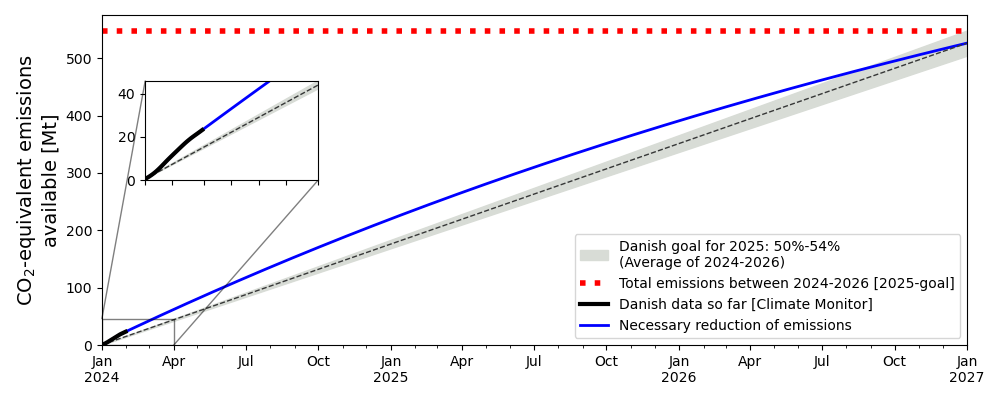

In [129]:

fig,ax = plt.subplots(figsize=(10,4))

axins = ax.inset_axes(
    [0.05, 0.5, 0.2, 0.3],
    #   xlim=(x1, x2), ylim=(y1, y2), 
    xticklabels=[],
    # yticklabels=[],
    )


for curax in [ax,axins]:


    curax.fill_between(
        dfGoal.index,
        dfGoal.Min.cumsum(),
        dfGoal.Max.cumsum(),
        color='xkcd:light grey',
        label='Danish goal for 2025: 50%-54%\n(Average of 2024-2026)'
    )
    curax.plot(dfGoal.Avg.cumsum(),color='xkcd:dark gray',ls='--',lw=1)

    curax.axhline(totalEmissionsMax,ls=':',color='r',label='Total emissions between 2024-2026 [2025-goal]',lw=4)
    # curax.plot(dfGoal.Min.cumsum())
    # curax.plot(dfGoal.Max.cumsum())
    curax.plot(dfGoal.MostRecent.cumsum(),lw=3,color='k',label='Danish data so far [Climate Monitor]')

    
    # curax.plot(dfGoal.MostRecentLog.cumsum(),lw=3,color='k',label='Danish data so far [Climate Monitor]')
    curax.plot(dfGoal.MostRecentLog.cumsum(),label='Necessary reduction of emissions',lw=2,color='b',zorder=1)

    


ax.legend()

axins.set_xlim([
    np.datetime64('2024-01-01'),
    np.datetime64('2024-04-01')
])
axins.set_ylim([0,np.round(2*dfGoal.MostRecent.sum())])

ax.set_xlim(left=np.datetime64('2024-01-01'))
ax.set_xlim(right=np.datetime64('2027-01-01'))
ax.set_ylim(bottom=0)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_ylabel(r'CO$_{2}$-equivalent emissions'+'\navailable [Mt]' ,fontsize=14)


ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator2)
ax.xaxis.set_major_formatter(formatter)

fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025Goal_C02Budget')

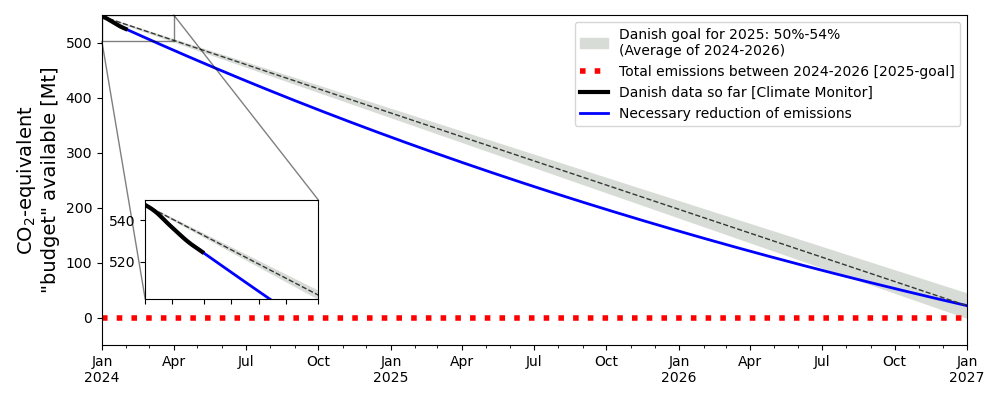

In [131]:

fig,ax = plt.subplots(figsize=(10,4))

axins = ax.inset_axes(
    [0.05, 0.14, 0.2, 0.3],
    #   xlim=(x1, x2), ylim=(y1, y2), 
    xticklabels=[],
    # yticklabels=[],
    )


for curax in [ax,axins]:


    curax.fill_between(
        dfGoal.index,
        totalEmissionsMax-dfGoal.Min.cumsum(),
        totalEmissionsMax-dfGoal.Max.cumsum(),
        color='xkcd:light grey',
        label='Danish goal for 2025: 50%-54%\n(Average of 2024-2026)'
    )
    curax.plot(totalEmissionsMax-dfGoal.Avg.cumsum(),color='xkcd:dark gray',ls='--',lw=1)

    curax.axhline(0,ls=':',color='r',label='Total emissions between 2024-2026 [2025-goal]',lw=4)
    # curax.plot(dfGoal.Min.cumsum())
    # curax.plot(dfGoal.Max.cumsum())
    curax.plot(totalEmissionsMax-dfGoal.MostRecent.cumsum(),lw=3,color='k',label='Danish data so far [Climate Monitor]')

    
    # curax.plot(dfGoal.MostRecentLog.cumsum(),lw=3,color='k',label='Danish data so far [Climate Monitor]')
    curax.plot(totalEmissionsMax-dfGoal.MostRecentLog.cumsum(),label='Necessary reduction of emissions',lw=2,color='b',zorder=1)

    


ax.legend()

axins.set_xlim([
    np.datetime64('2024-01-01'),
    np.datetime64('2024-04-01')
])
axins.set_ylim([totalEmissionsMax-np.round(2*dfGoal.MostRecent.sum()),totalEmissionsMax+10])
axins.set_ylim([totalEmissionsMax-np.round(2*dfGoal.MostRecent.sum()),550])

ax.set_xlim(left=np.datetime64('2024-01-01'))
ax.set_xlim(right=np.datetime64('2027-01-01'))
ax.set_ylim(bottom=-50)
ax.set_ylim(top=550)

ax.indicate_inset_zoom(axins, edgecolor="black")

# ax.set_ylabel('C02')

ax.set_ylabel(r'CO$_{2}$-equivalent'+'\n"budget" available [Mt]' ,fontsize=14)


ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator2)
ax.xaxis.set_major_formatter(formatter)


fig.tight_layout()
if saveFigures:
    fig.savefig('StatusOfThe2025Goal_C02BudgetReversed')